
Neural Network Classification
```
# This is formatted as code
```



In [ ]:
import torch as t
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as p
import sklearn
from sklearn.datasets import make_circles

In [ ]:
#Generate 1000 samples
n_samples = 1000
#Create circles
X , y = make_circles(n_samples , noise= 0.03 , random_state=42)

X[:1] , y[:1] , len(X) , len(y)

(array([[0.75424625, 0.23148074]]), array([1]), 1000, 1000)

In [ ]:
print(f"First 5 samples of X :\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X :
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [ ]:
#Create a dataframe
circle = p.DataFrame({"X1" : X[:,0],
                      "X2" : X[:,1],
                      "labels" : y})
circle.head(10)

,X1,X2,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


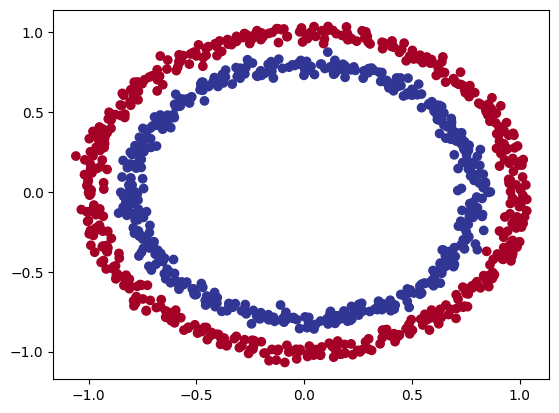

In [ ]:
plt.scatter(x = X[:,0],
            y = X[:,1],
            c = y,
            cmap = plt.cm.RdYlBu)

The current data on which we are currently working is referred as toydataset, that is small enough to experiement on but sizeable enough to practice.

In [ ]:
#check the shape of inputs and output.
X_sample = X[0]
y_sample = y[0]
X_sample , y_sample , X_sample.shape , y_sample.shape , X.shape , y.shape

(array([0.75424625, 0.23148074]), 1, (2,), (), (1000, 2), (1000,))

In [ ]:
#turn data into tensor. Before change check its type using X.type and its datatype using X.dtype then turn accordingly
X = t.from_numpy(X).type(t.float)
y = t.from_numpy(y).type(t.float)
X[:2], y[:2]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533]]),
 tensor([1., 1.]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,
                                                       y,
                                                       test_size=0.2,
                                                       random_state=42)

len(X_train) , len(y_train) , len(X_test) , len(y_test)

(800, 800, 200, 200)

In [ ]:
#model generation
device = "cuda" if t.cuda.is_available() else "cpu"
X_train.shape

torch.Size([800, 2])

In [ ]:
class circleClassmodel(nn.Module):
  def __init__(self):
    super().__init__()
    #create two  layers of nn so that they matches the shape of out data
    self.layer1 = nn.Linear(in_features= 2 , out_features= 10) #take in 2 features and upscale to 5 features
    self.layer2 = nn.Linear(in_features=10 , out_features=10)
    self.layer3 = nn.Linear(in_features = 10 , out_features = 1) #takes in 5 features from previous layers and upscale to 1 output.


  def forward(self,x):
    return self.layer3(self.layer2(self.layer1(x))) #Here input x goes into layer 1 then output of layer 1 is passed to layer 2 and then output is retuned.

Create using nn.Sequential
model_0 = nn.Sequential( nn.Linear(in_features= 2 , out_features= 5),
                         nn.Linear(in_features= 5 , out_features= 1)
                        ).to(device)

In [ ]:
model_0 = circleClassmodel().to(device)
model_0

circleClassmodel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[-0.3871, -0.2366],
                      [-0.2591,  0.1465],
                      [-0.3166,  0.4010],
                      [-0.1462, -0.5253],
                      [-0.6371, -0.4983],
                      [-0.0507, -0.2563],
                      [ 0.4688, -0.5547],
                      [-0.0158,  0.0701],
                      [ 0.0489, -0.2192],
                      [ 0.6126, -0.3886]], device='cuda:0')),
             ('layer1.bias',
              tensor([ 0.5333,  0.1037,  0.7053,  0.5094, -0.4615, -0.1498,  0.0630, -0.6650,
                      -0.3020, -0.4136], device='cuda:0')),
             ('layer2.weight',
              tensor([[-0.0550, -0.2346, -0.0092, -0.2953, -0.1460, -0.0823, -0.2655, -0.0556,
                       -0.2827,  0.0770],
                      [-0.3145, -0.1503, -0.2740, -0.1091,  0.0391, -0.2283,  0.0641,  0.2439,
                       -0.2482, -0.0628],
                      [ 0.0348, -0.1867, 

In [ ]:
#make predicitions
with t.inference_mode():
  y_preds = model_0(X_test.to(device))
t.round(y_preds[:5]) , y_test[:5]

(tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.]))

In [ ]:
#loss function
loss_fn = nn.BCEWithLogitsLoss() #BCEWithLogitsLoss has inbuilt sigmoid activation if using only BCELoss() then make sure use nn.Sequential(nn.Sigmoid() , nn.BCELoss)

#Optimizer
optimizer = t.optim.SGD(params = model_0.parameters() , lr = 0.01)

#calcaulate accuracy
def accuracy_fn(y_true , y_pred):
  correct = t.eq(y_true , y_pred).sum().item()
  total = y_pred.numel()
  acc = (correct / total) * 100
  return acc

Our model outputs are known as raw"logits"
Going from raw logits -> predicition probabilites -> predicition labels
this logits can be passed to some activation function to convert it into predicition probabilities(sigmoid for binary and softmax for multiclass)

then we can convert prediction probabilities to prediction labels by either rounding or taking argmax

In [ ]:
model_0.eval()
with t.inference_mode():
  logits_y = model_0(X_test.to(device))[:5]
logits_y , y_test[:5]

(tensor([[0.3633],
         [0.3086],
         [0.4064],
         [0.3515],
         [0.2471]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.]))

In [ ]:
predict = t.sigmoid(logits_y)
predict

tensor([[0.5898],
        [0.5765],
        [0.6002],
        [0.5870],
        [0.5615]], device='cuda:0')

In [ ]:
t.round(predict), y_test[:5]

(tensor([[1.],
         [1.],
         [1.],
         [1.],
         [1.]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.]))

In [ ]:
#train the model
t.cuda.manual_seed(42)
t.manual_seed(42)
epochs = 1000

X_train , X_test , y_train , y_test = X_train.to(device),X_test.to(device),y_train.to(device),y_test.to(device)
for epoch in range(epochs):
  model_0.train()

  #forward pass with logits
  y_logits = model_0(X_train).squeeze()
  y_preds = t.round(t.sigmoid(y_logits))

  #loss

  loss = loss_fn(y_logits , y_train ) #loss with logits since using BCEWithLogits no need to logits with sigmoid would have passed y_pred if used BCELoss() as loss_fn
  accuracy = accuracy_fn(y_true = y_preds , y_pred = y_train)

  #zero gradient optimizer
  optimizer.zero_grad()

  #Backpropogation
  loss.backward()

  #step optimizer
  optimizer.step()

  model_0.eval()
  with t.inference_mode():
    test_logit = model_0(X_test).squeeze()
    test_preds = t.round(t.sigmoid(test_logit))
    loss_test = loss_fn(test_logit , y_test)
    acc_test = accuracy_fn(y_true = test_preds , y_pred = y_test)

  if epoch % 100 == 0:
    print(f"Epoch : {epoch} , Loss : {loss:.5f},Accuracy : {accuracy:.2f}% , test_loss : {loss_test:.5f} , Accuracy_test : {acc_test:.2f}%")
print(model_0.state_dict())

Epoch : 0 , Loss : 0.70625,Accuracy : 50.00% , test_loss : 0.70429 , Accuracy_test : 50.00%
Epoch : 100 , Loss : 0.69764,Accuracy : 50.00% , test_loss : 0.69598 , Accuracy_test : 50.00%
Epoch : 200 , Loss : 0.69499,Accuracy : 57.88% , test_loss : 0.69355 , Accuracy_test : 58.00%
Epoch : 300 , Loss : 0.69411,Accuracy : 51.75% , test_loss : 0.69287 , Accuracy_test : 56.00%
Epoch : 400 , Loss : 0.69377,Accuracy : 51.12% , test_loss : 0.69273 , Accuracy_test : 51.00%
Epoch : 500 , Loss : 0.69362,Accuracy : 50.75% , test_loss : 0.69275 , Accuracy_test : 51.00%
Epoch : 600 , Loss : 0.69352,Accuracy : 50.25% , test_loss : 0.69282 , Accuracy_test : 51.00%
Epoch : 700 , Loss : 0.69345,Accuracy : 50.38% , test_loss : 0.69290 , Accuracy_test : 50.50%
Epoch : 800 , Loss : 0.69340,Accuracy : 50.50% , test_loss : 0.69298 , Accuracy_test : 48.50%
Epoch : 900 , Loss : 0.69335,Accuracy : 50.38% , test_loss : 0.69307 , Accuracy_test : 49.00%
OrderedDict([('layer1.weight', tensor([[-0.3839, -0.2353],
   

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

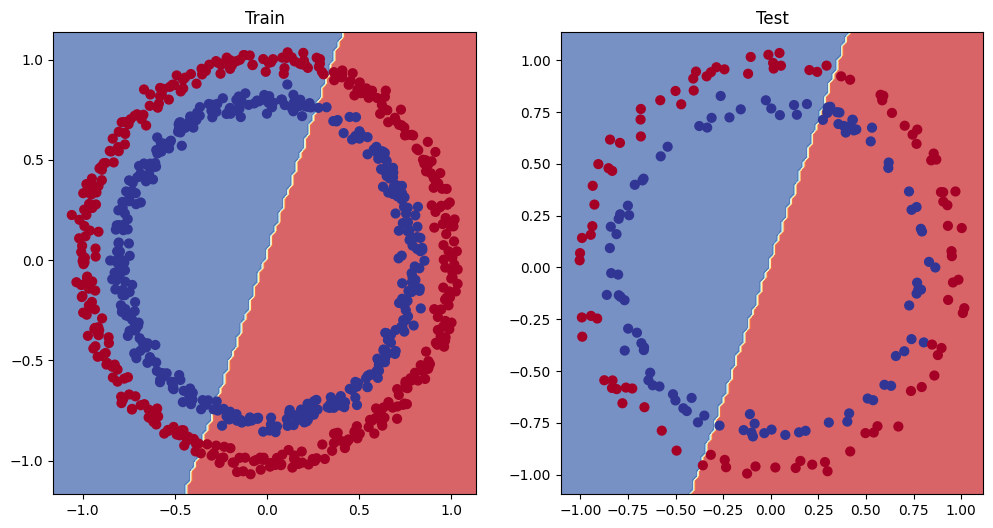

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

nn.ReLu()
What it does: The ReLU function activates a neuron only if the input is positive; otherwise, it will output zero. It can be mathematically defined as f(x) = max(0, x). If x (the input to a neuron) is greater than zero, f(x) is x. If x is less than or equal to zero, f(x) is 0.
Purpose: It introduces non-linearity into the model, which allows the network to learn more complex patterns. Without such non-linear functions, a neural network, no matter how many layers it has, would behave just like a single-layer network because linear operations can always be condensed into a single linear transformation.
Advantages: ReLU is computationally efficient, which speeds up training compared to other activation functions like sigmoid or tanh. It also helps mitigate the vanishing gradient problem, which can hinder the learning process in deep networks.

In [ ]:
weigth = 0.7
bias = 0.3
X_reg = t.arange(0 , 1 , 0.01).unsqueeze(dim = 1)
y_reg = weigth * X_reg + bias
Train_split_reg = int(0.8 * len(X_reg))
X_regtrain ,  y_regtrain, X_regtest , y_regtest = X_reg[:Train_split_reg] , y_reg[:Train_split_reg] , X_reg[Train_split_reg:], y_reg[Train_split_reg:]
len(X_regtrain), len(X_regtest) , len(y_regtrain) , len(y_regtest)

(80, 20, 80, 20)

In [ ]:
model_1 = nn.Sequential(nn.Linear(in_features = 1  , out_features= 10) ,nn.Linear(in_features = 10 , out_features=10)
,nn.Linear(in_features=10 , out_features = 1)).to(device)
model_1

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_reg = nn.L1Loss()
optimizer_reg = t.optim.SGD(params = model_1.parameters(),lr=0.01)

In [ ]:
#train the model
t.cuda.manual_seed(42)
t.manual_seed(42)
epochs = 1000

X_regtrain , X_regtest , y_regtrain , y_regtest = X_regtrain.to(device),X_regtest.to(device),y_regtrain.to(device),y_regtest.to(device)
for epoch in range(epochs):
  # model_1.train()
  #forward pass with logits
  y_regpred = model_1(X_regtrain)

  #loss

  loss_regs = loss_reg(y_regpred , y_regtrain ) #loss with logits since using BCEWithLogits no need to logits with sigmoid would have passed y_pred if used BCELoss() as loss_fn

  #zero gradient optimizer
  optimizer_reg.zero_grad()

  #Backpropogation
  loss_regs.backward()

  #step optimizer
  optimizer_reg.step()

  model_1.eval()
  with t.inference_mode():
    test_logitreg = model_1(X_regtest)
    loss_test = loss_reg(test_logitreg , y_regtest)

  if epoch % 100 == 0:
    print(f"Epoch : {epoch} , Loss : {loss}, test_loss : {loss_test}")

Epoch : 0 , Loss : 0.6933030486106873, test_loss : 0.9110288619995117
Epoch : 100 , Loss : 0.6933030486106873, test_loss : 0.0008127063629217446
Epoch : 200 , Loss : 0.6933030486106873, test_loss : 0.0020921409595757723
Epoch : 300 , Loss : 0.6933030486106873, test_loss : 0.0030510127544403076
Epoch : 400 , Loss : 0.6933030486106873, test_loss : 0.003407776355743408
Epoch : 500 , Loss : 0.6933030486106873, test_loss : 0.0038725852500647306
Epoch : 600 , Loss : 0.6933030486106873, test_loss : 0.0037891955580562353
Epoch : 700 , Loss : 0.6933030486106873, test_loss : 0.003813472343608737
Epoch : 800 , Loss : 0.6933030486106873, test_loss : 0.0032875032629817724
Epoch : 900 , Loss : 0.6933030486106873, test_loss : 0.003603896591812372


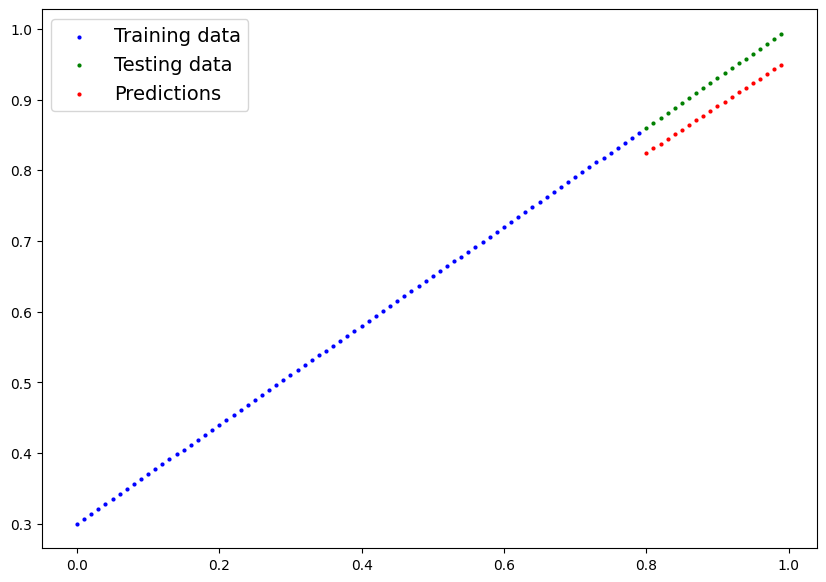

In [ ]:
model_1.eval()
with t.inference_mode():
    y_preds = model_1(X_regtest)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_regtrain.cpu(),
                 train_labels=y_regtrain.cpu(),
                 test_data=X_regtest.cpu(),
                 test_labels=y_regtest.cpu(),
                 predictions=y_preds.cpu());

In machine learning, using an infinite number of straight and non-straight lines (such as curves) allows you to create complex decision boundaries capable of classifying or fitting almost any conceivable dataset, no matter how intricate the distribution of the data points might be.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

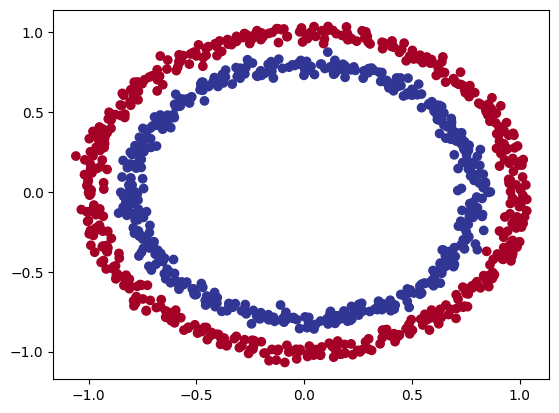

In [ ]:
N_samples = 1000
X , y = make_circles(N_samples , noise = 0.03 ,random_state=42)
plt.scatter(X[:,0] , X[:,1] , c = y , cmap = plt.cm.RdYlBu)

In [ ]:
X = t.from_numpy(X).type(t.float)
y = t.from_numpy(y).type(t.float)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

A non-linear function is a mathematical function where there is not a straight line relationship between the input and output; the output does not change proportionally with changes in input. This allows for more complex behaviors including curves and multiple values of output for a single input.

In [ ]:
class circlemodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2 , out_features=10)
    self.layer2 = nn.Linear(in_features=10 , out_features=10)
    self.layer3 = nn.Linear(in_features=10 , out_features=1)
    self.relu = nn.ReLU()
    #helps us to introduce nonlinearity which help model learn more complex and allows model to go through different or else it will act as single layer

  def forward(self , x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_2 = circlemodel().to(device)
model_2

circlemodel(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = t.optim.SGD(model_2.parameters(), lr=0.1)

In [ ]:
t.manual_seed(42)
t.cuda.manual_seed(42)

epochs = 1000

X_train , X_test , y_train , y_test = X_train.to(device) , X_test.to(device) , y_train.to(device) , y_test.to(device)

for epoch in range(epochs):
  model_2.train()

  #forward pass
  y_logits = model_2(X_train).squeeze()
  y_preds  = t.round(t.sigmoid(y_logits))

  #loss function
  loss = loss_fn(y_logits , y_train)
  accuracy = accuracy_fn(y_true = y_train  , y_pred = y_preds)

  #optimizer
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with t.inference_mode():
    y_tlogits = model_2(X_test).squeeze()
    y_tpred = t.round(t.sigmoid(y_tlogits))
    loss_t = loss_fn(y_tlogits , y_test)
    acc_t = accuracy_fn(y_true= y_test  , y_pred= y_tpred)

  if epoch % 100 == 0:
    print(f"Epoch : {epoch} , Loss : {loss:.5f} , Accuracy : {accuracy:.2f} , TLoss : {loss_t:.5f} , Taccuracy : {acc_t:.2f}")


Epoch : 0 , Loss : 0.69295 , Accuracy : 50.00 , TLoss : 0.69319 , Taccuracy : 50.00
Epoch : 100 , Loss : 0.69115 , Accuracy : 52.88 , TLoss : 0.69102 , Taccuracy : 52.50
Epoch : 200 , Loss : 0.68977 , Accuracy : 53.37 , TLoss : 0.68940 , Taccuracy : 55.00
Epoch : 300 , Loss : 0.68795 , Accuracy : 53.00 , TLoss : 0.68723 , Taccuracy : 56.00
Epoch : 400 , Loss : 0.68517 , Accuracy : 52.75 , TLoss : 0.68411 , Taccuracy : 56.50
Epoch : 500 , Loss : 0.68102 , Accuracy : 52.75 , TLoss : 0.67941 , Taccuracy : 56.50
Epoch : 600 , Loss : 0.67515 , Accuracy : 54.50 , TLoss : 0.67285 , Taccuracy : 56.00
Epoch : 700 , Loss : 0.66659 , Accuracy : 58.38 , TLoss : 0.66322 , Taccuracy : 59.00
Epoch : 800 , Loss : 0.65160 , Accuracy : 64.00 , TLoss : 0.64757 , Taccuracy : 67.50
Epoch : 900 , Loss : 0.62362 , Accuracy : 74.00 , TLoss : 0.62145 , Taccuracy : 79.00


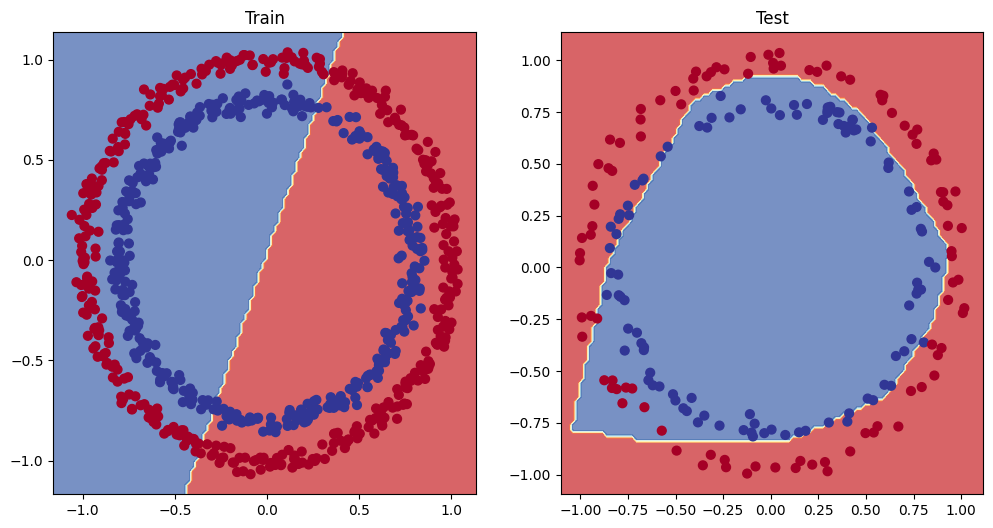

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test) # model_3 = has non-linearity

In [ ]:
A = t.arange(-10,10,1,dtype = t.float32)
A , A.dtype

(tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]),
 torch.float32)

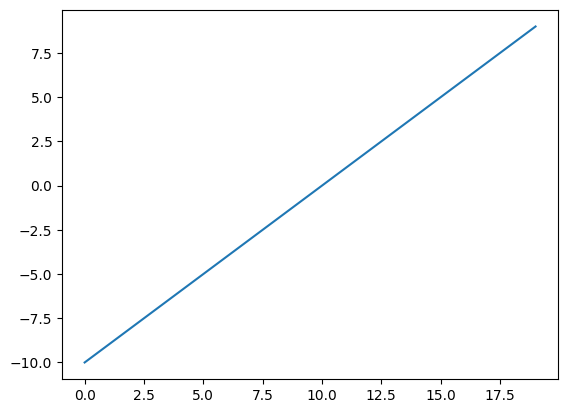

In [ ]:
plt.plot(A)

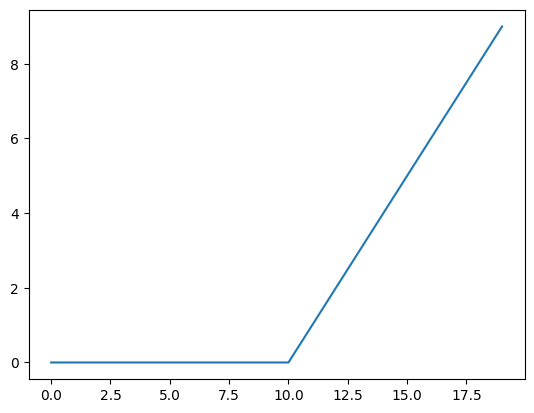

In [ ]:
plt.plot(t.relu(A))

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
         8., 9.]),
 [<matplotlib.lines.Line2D at 0x7daf8c14b490>])

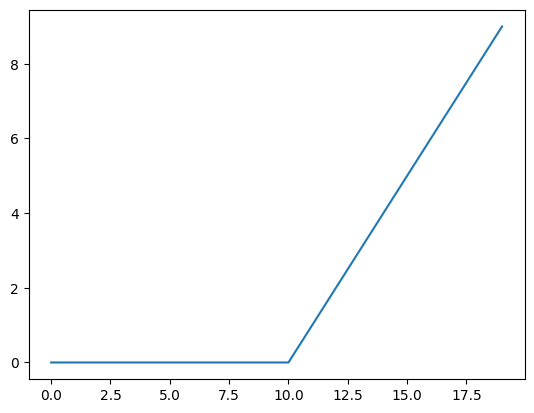

In [ ]:
def relu(x:t.Tensor) -> t.Tensor:
  return t.maximum(t.tensor(0),x)
relu(A) , plt.plot(relu(A))

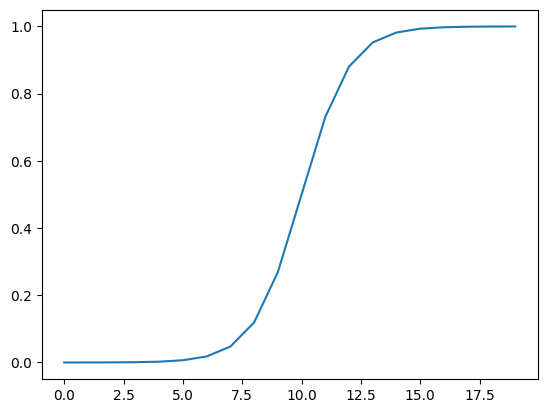

In [ ]:
plt.plot(t.sigmoid(A))

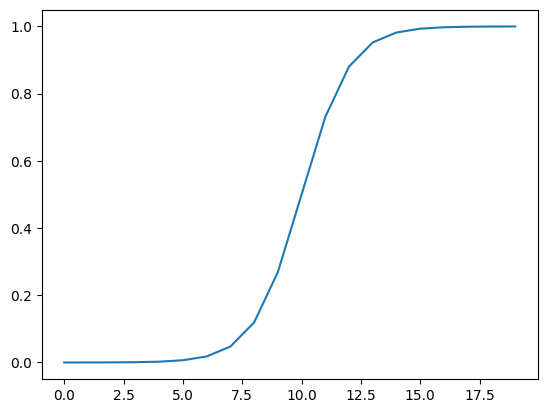

In [ ]:
def sigmoid(x):
  return 1 / (1 + t.exp(-x))
plt.plot(sigmoid(A))

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X , y = make_blobs(n_samples=1000 ,
                   n_features=2,   #in_features/ input
                   centers=4,      #outfeatures/ output
                   cluster_std = 1.5,
                   random_state=42)
X[:5] , y[:5]

(array([[-8.41339595,  6.93516545],
        [-5.76648413, -6.43117072],
        [-6.04213682, -6.76610151],
        [ 3.95083749,  0.69840313],
        [ 4.25049181, -0.28154475]]),
 array([3, 2, 2, 1, 1]))

In [ ]:
X = t.from_numpy(X).type(t.float)
y = t.from_numpy(y).type(t.LongTensor)

X_train , X_test ,y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)
len(X_train), len(y_train)

(800, 800)

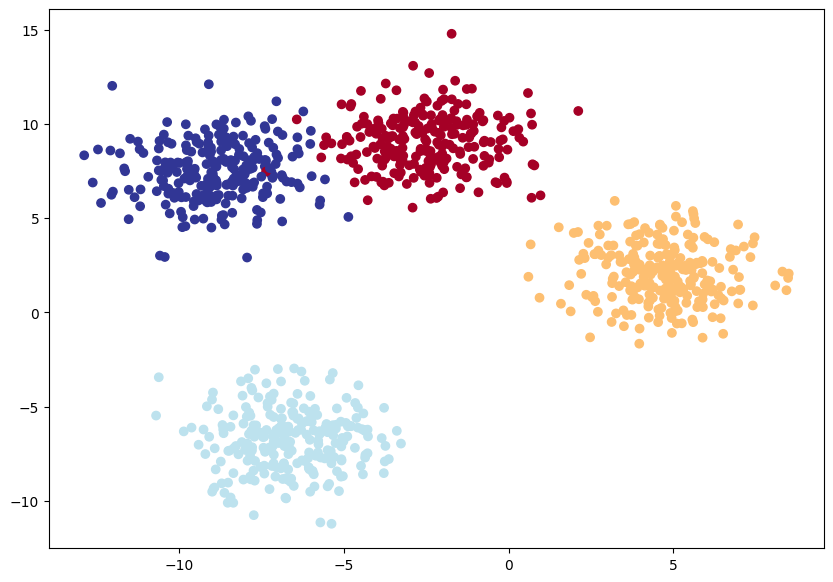

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [ ]:
class multiclass(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_stacked = nn.Sequential(nn.Linear(in_features= 2 , out_features=8), nn.ReLU() , nn.Linear(in_features = 8 , out_features =8)
                                        ,nn.ReLU(), nn.Linear(in_features = 8 , out_features = 4))

  def forward(self,x):
    return self.layer_stacked(x)

model_3 = multiclass().to(device)
model_3

multiclass(
  (layer_stacked): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = t.optim.Adam(model_3.parameters() , lr = 0.01)

In [ ]:
t.manual_seed(42)
t.cuda.manual_seed(42)

epochs = 100
X_train , X_test ,y_train , y_test = X_train.to(device) , X_test.to(device) ,y_train.to(device) , y_test.to(device)

for epoch in range(epochs):
  model_3.train()
  y_logit = model_3(X_train)
  y_preds = t.softmax(y_logit , dim=1).argmax(dim =1)
  loss = loss_fn(y_logit , y_train)
  accuracy = accuracy_fn(y_true= y_train , y_pred = y_preds)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with t.inference_mode():
    y_tlogit = model_3(X_test)
    y_tpreds = t.softmax(y_tlogit , dim=1).argmax(dim =1)
    t_loss = loss_fn(y_tlogit , y_test)
    t_accuracy = accuracy_fn(y_true= y_test , y_pred = y_tpreds)

  if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {accuracy:.2f}% | Test Loss: {t_loss:.5f}, Test Acc: {t_accuracy:.2f}%")


Epoch: 0 | Loss: 1.15883, Acc: 40.38% | Test Loss: 1.09778, Test Acc: 46.50%
Epoch: 10 | Loss: 0.66860, Acc: 80.88% | Test Loss: 0.68123, Test Acc: 93.00%
Epoch: 20 | Loss: 0.38183, Acc: 98.00% | Test Loss: 0.36981, Test Acc: 99.00%
Epoch: 30 | Loss: 0.12265, Acc: 98.88% | Test Loss: 0.10953, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04622, Acc: 99.25% | Test Loss: 0.03843, Test Acc: 99.50%
Epoch: 50 | Loss: 0.03069, Acc: 99.25% | Test Loss: 0.02161, Test Acc: 99.50%
Epoch: 60 | Loss: 0.02691, Acc: 99.25% | Test Loss: 0.01760, Test Acc: 99.50%
Epoch: 70 | Loss: 0.02535, Acc: 99.25% | Test Loss: 0.01534, Test Acc: 99.50%
Epoch: 80 | Loss: 0.02456, Acc: 99.12% | Test Loss: 0.01451, Test Acc: 99.50%
Epoch: 90 | Loss: 0.02404, Acc: 99.38% | Test Loss: 0.01350, Test Acc: 99.50%


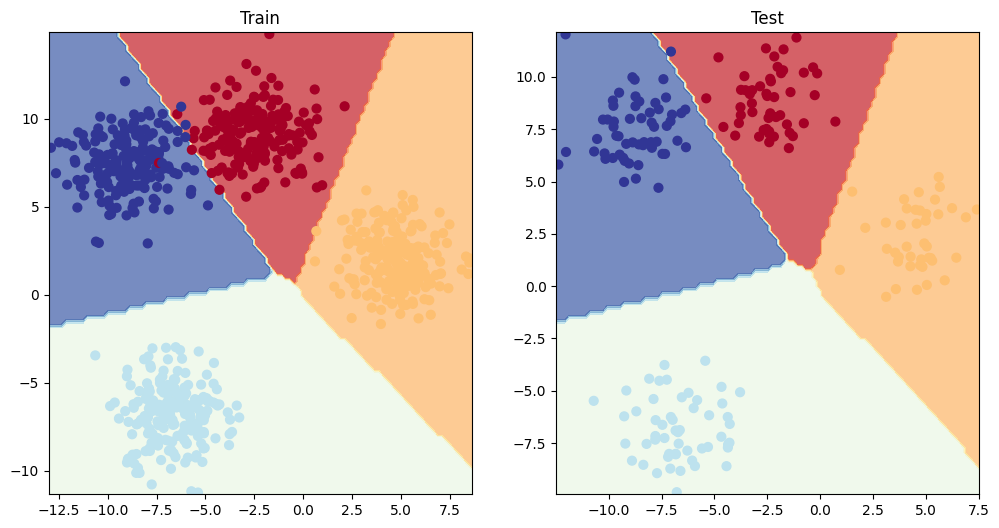

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

In [ ]:
!pip install torchmetrics==0.9.3

In [ ]:
from torchmetrics import Accuracy
acc = Accuracy(tasks = 'multiclass' , num_classes=4).to(device)
acc(y_tpreds , y_test)

tensor(0.9950, device='cuda:0')

In [ ]:
from torchmetrics import F1Score

In [ ]:
f1_score = F1Score(task = 'multiclass' , num_classes=4).to(device)
f1_score(y_preds , y_train)

tensor(0.9937, device='cuda:0')